In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 


In [2]:
# importing dataset 
data =pd.read_csv("Groceries_data.csv")
data.head(10)

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,21-07-2015,tropical fruit,2015,7,21,1
1,2552,01-05-2015,whole milk,2015,5,1,4
2,2300,19-09-2015,pip fruit,2015,9,19,5
3,1187,12-12-2015,other vegetables,2015,12,12,5
4,3037,02-01-2015,whole milk,2015,1,2,4
5,4941,14-02-2015,rolls/buns,2015,2,14,5
6,4501,05-08-2015,other vegetables,2015,8,5,2
7,3803,23-12-2015,pot plants,2015,12,23,2
8,2762,20-03-2015,whole milk,2015,3,20,4
9,4119,02-12-2015,tropical fruit,2015,12,2,2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
 3   year             38765 non-null  int64 
 4   month            38765 non-null  int64 
 5   day              38765 non-null  int64 
 6   day_of_week      38765 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 2.1+ MB


In [4]:
data.isnull().sum()

Member_number      0
Date               0
itemDescription    0
year               0
month              0
day                0
day_of_week        0
dtype: int64

In [5]:
import datetime 
from datetime import date    #for replacing month and days with names 

In [6]:
data["month"]= data["month"].replace((1,2,3,4,5,6,7,8,9,10,11,12),('January ','February','March','April' ,'May' ,'June'  ,'July' ,'August','September','October','November','December'))
data["day_of_week"] = data["day_of_week"].replace((0,1,2,3,4,5,6),('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))
data

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,21-07-2015,tropical fruit,2015,July,21,Tuesday
1,2552,01-05-2015,whole milk,2015,May,1,Friday
2,2300,19-09-2015,pip fruit,2015,September,19,Saturday
3,1187,12-12-2015,other vegetables,2015,December,12,Saturday
4,3037,02-01-2015,whole milk,2015,January,2,Friday
...,...,...,...,...,...,...,...
38760,4471,10-08-2014,sliced cheese,2014,August,10,Sunday
38761,2022,23-02-2014,candy,2014,February,23,Sunday
38762,1097,16-04-2014,cake bar,2014,April,16,Wednesday
38763,1510,12-03-2014,fruit/vegetable juice,2014,March,12,Wednesday


In [7]:
# for renaming column
data.rename(columns={"itemDescription":"Item"},inplace=True)
data  

,Member_number,Date,Item,year,month,day,day_of_week
0,1808,21-07-2015,tropical fruit,2015,July,21,Tuesday
1,2552,01-05-2015,whole milk,2015,May,1,Friday
2,2300,19-09-2015,pip fruit,2015,September,19,Saturday
3,1187,12-12-2015,other vegetables,2015,December,12,Saturday
4,3037,02-01-2015,whole milk,2015,January,2,Friday
...,...,...,...,...,...,...,...
38760,4471,10-08-2014,sliced cheese,2014,August,10,Sunday
38761,2022,23-02-2014,candy,2014,February,23,Sunday
38762,1097,16-04-2014,cake bar,2014,April,16,Wednesday
38763,1510,12-03-2014,fruit/vegetable juice,2014,March,12,Wednesday


In [8]:
# number of unique customer
data['Member_number'].nunique()

3898

In [9]:
# for checking none values present no none values present
data['Item'] =data['Item'].str.lower()
(data['Item'] == 'none').value_counts()

False    38765
Name: Item, dtype: int64

In [10]:
# for removing none values
data = data.drop(data[data.Item == 'none'].index)
data.head(20)

,Member_number,Date,Item,year,month,day,day_of_week
0,1808,21-07-2015,tropical fruit,2015,July,21,Tuesday
1,2552,01-05-2015,whole milk,2015,May,1,Friday
2,2300,19-09-2015,pip fruit,2015,September,19,Saturday
3,1187,12-12-2015,other vegetables,2015,December,12,Saturday
4,3037,02-01-2015,whole milk,2015,January,2,Friday
5,4941,14-02-2015,rolls/buns,2015,February,14,Saturday
6,4501,05-08-2015,other vegetables,2015,August,5,Wednesday
7,3803,23-12-2015,pot plants,2015,December,23,Wednesday
8,2762,20-03-2015,whole milk,2015,March,20,Friday
9,4119,02-12-2015,tropical fruit,2015,December,2,Wednesday


In [11]:
# number of unique items
data['Item'].nunique()

167

In [12]:
# data['Item'].unique()

In [13]:
# to know number of rows and columns
data.shape

(38765, 7)

In [14]:
data['Item'].count()

38765

In [15]:
# data exploration for which product is most purchase by customer

-value_counts returns an object containing counts of unique values
-to sort in alphabetical order we can use sort_index(ascending =True)
-to use percentage count we use normalize=True as parameter
-count of null values an be displayed easily by setting the dropna parameter to False
-using groupby we can group one cloumn and count the values of of another cloumn Syntax - df.groupby('your_column_1')['your_column_2'].value_counts()
 

In [16]:
x = data['Item'].value_counts(dropna=False).sort_values(ascending=False)[:15]
# x=data.groupby('Item')['month'].value_counts()[:15]
# x= data['Item'].value_counts().sort_values(ascending=False) [:10]
x

whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
pastry               785
pip fruit            744
shopping bags        731
canned beer          717
bottled beer         687
Name: Item, dtype: int64

In [17]:
x=data.groupby('Item')['month'].value_counts()[:15]
x

Item              month    
abrasive cleaner  March        4
                  September    3
                  August       2
                  February     2
                  July         2
                  June         2
                  May          2
                  April        1
                  December     1
                  January      1
                  November     1
                  October      1
artif. sweetener  February     4
                  March        4
                  April        3
Name: month, dtype: int64

In [18]:
x=data.groupby('Item')['year'].value_counts()[:10]
x

Item              year
abrasive cleaner  2014    12
                  2015    10
artif. sweetener  2015    16
                  2014    13
baby cosmetics    2015     2
                  2014     1
bags              2015     3
                  2014     1
baking powder     2014    67
                  2015    55
Name: year, dtype: int64

In [19]:
x=data.groupby('Item')['day_of_week'].value_counts()[:20]
x

Item              day_of_week
abrasive cleaner  Wednesday      6
                  Sunday         4
                  Thursday       4
                  Friday         2
                  Monday         2
                  Saturday       2
                  Tuesday        2
artif. sweetener  Thursday       6
                  Saturday       5
                  Tuesday        5
                  Friday         4
                  Monday         4
                  Wednesday      3
                  Sunday         2
baby cosmetics    Friday         1
                  Monday         1
                  Saturday       1
bags              Monday         1
                  Saturday       1
                  Sunday         1
Name: day_of_week, dtype: int64

In [20]:
x= data['Item'].value_counts(normalize=True).sort_values(ascending=False) [:10]  
x

whole milk          0.064543
other vegetables    0.048962
rolls/buns          0.044267
soda                0.039056
yogurt              0.034412
root vegetables     0.027628
tropical fruit      0.026622
bottled water       0.024068
sausage             0.023836
citrus fruit        0.020947
Name: Item, dtype: float64

C:\Users\Vishwaraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


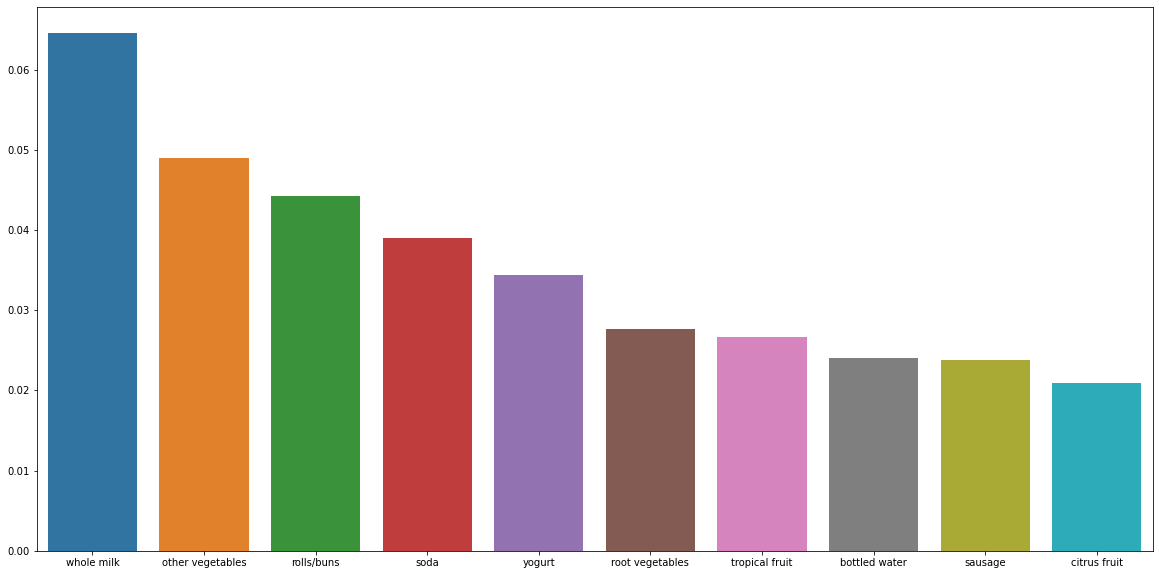

In [21]:
# which is item is purschase most
plt.figure(figsize=(20,10));
sns.barplot(x.index,x.values);

In [22]:
#total of itmes  sales by Years
datayears = data.groupby("year")["Item"].count().reset_index()
datayears

,year,Item
0,2014,18277
1,2015,20488


In [23]:
#total of itmes  sales by month
datamonth = data.groupby("month")["Item"].count().reset_index()
datamonth



,month,Item
0,April,3172
1,August,3498
2,December,3074
3,February,3032
4,January,3333
5,July,3268
6,June,3316
7,March,3283
8,May,3335
9,November,3273


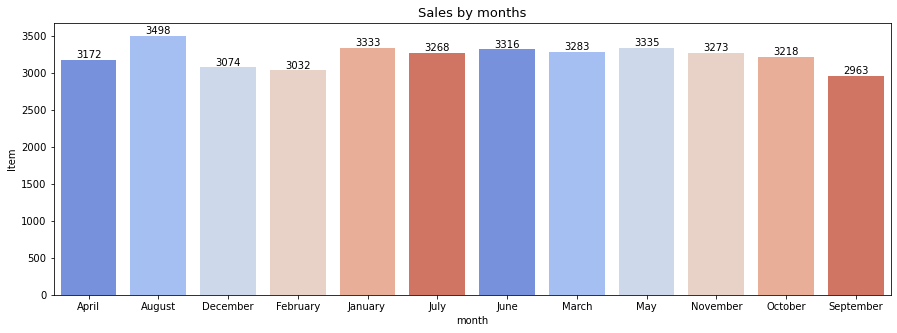

In [24]:
plt.figure(figsize=(15,5))
colors=sns.color_palette("coolwarm")
ax=sns.barplot(x="month",y="Item",data=datamonth,palette=colors)
for i in ax.containers:
     ax.bar_label(i)
plt.title('Sales by months',size=13)            
plt.show()

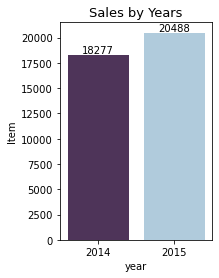

In [25]:
plt.subplot(1,2,2)
ax=sns.barplot(x="year",y="Item",data=datayears,palette=("#512E5F","#A9CCE3"))
for i in ax.containers:
    ax.bar_label(i)
plt.title('Sales by Years',size=13)    
plt.show()


In [26]:
# for count of product
# transactions = data.groupby(['Member_number', 'Date'])
# transactions.count()

In [27]:
# to get pivot table [unstack is used]
# transactions = data.groupby(['Member_number','Item']).sum().reset_index().set_index('Member_number')
# transactions =transactions.fillna(0)


# transactions = data.groupby(['Member_number']).agg({'count'}) ['Date'].sort_values(['count'])
# transactions      # how many products does each customer usually buy

In [28]:
#   transactions .describe()

# Apriori Algorithm



It is an algorithm that uses frequent itemset to genera te association rules. It is based on the concept that a subset of a frequent itemset must also be a frequent itemset.

Support : It is the frequency of item a or combination of item A and B.

Confidence: It tells us how often the items a and b occur given that a is bought.

Lift: It tells us the strength of the rule.

Support = freq(A,B)/N

A and B Products

N is total Transactions

Confidence = freq(A,B) / freq(A)

Lift = Support / support(A) * Support(B)


Think of the following rule: If product X was purchased, then recommend product Y

The antecedent is the product X and the consequent is the product Y. 

.antecedent support: frequency at which antecedents (x) occurred in all baskets
.consequent support: frequency at which consequents (y)occurred in all baskets
.support: frequency at which antecedents (x) and consequents (y) occurred in all baskets together 
.confidence: probability of the consequent(y) occurring given that the antecedent (x) occurred

confidence means  frequency of often one product purchase if another product is purchase
  
  
 lift : it find out the togetherness of 2 items a as no corelation with c keeping the two products  it is there two find out realtion betwwen them.
 
.A Lift of 1 means there is no association between products.
.Lift of greater than 1 means that products are more likely to be bought together.    


In [29]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [30]:
data

,Member_number,Date,Item,year,month,day,day_of_week
0,1808,21-07-2015,tropical fruit,2015,July,21,Tuesday
1,2552,01-05-2015,whole milk,2015,May,1,Friday
2,2300,19-09-2015,pip fruit,2015,September,19,Saturday
3,1187,12-12-2015,other vegetables,2015,December,12,Saturday
4,3037,02-01-2015,whole milk,2015,January,2,Friday
...,...,...,...,...,...,...,...
38760,4471,10-08-2014,sliced cheese,2014,August,10,Sunday
38761,2022,23-02-2014,candy,2014,February,23,Sunday
38762,1097,16-04-2014,cake bar,2014,April,16,Wednesday
38763,1510,12-03-2014,fruit/vegetable juice,2014,March,12,Wednesday


In [31]:
# product count 
data['Quantity'] = 1
data

,Member_number,Date,Item,year,month,day,day_of_week,Quantity
0,1808,21-07-2015,tropical fruit,2015,July,21,Tuesday,1
1,2552,01-05-2015,whole milk,2015,May,1,Friday,1
2,2300,19-09-2015,pip fruit,2015,September,19,Saturday,1
3,1187,12-12-2015,other vegetables,2015,December,12,Saturday,1
4,3037,02-01-2015,whole milk,2015,January,2,Friday,1
...,...,...,...,...,...,...,...,...
38760,4471,10-08-2014,sliced cheese,2014,August,10,Sunday,1
38761,2022,23-02-2014,candy,2014,February,23,Sunday,1
38762,1097,16-04-2014,cake bar,2014,April,16,Wednesday,1
38763,1510,12-03-2014,fruit/vegetable juice,2014,March,12,Wednesday,1


In [32]:
transactions =  data.groupby(['Member_number','Item'])['Quantity'].sum().unstack().reset_index().set_index('Member_number')

In [33]:
# if member not purchase the item value 0
transactions=transactions.fillna(0)
transactions

Item,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,...,uht-milk,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
# customer buyed multiple times we will count it 1  
def encode(x):
    if x <=0:
        return 0
    elif x>=0:
        return 1
basket = transactions.applymap(encode)

In [35]:
basket

Item,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,...,uht-milk,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [37]:
#   if product is not purchased its suppport is less we set parameter min support if product supprot is less than min spport  which we will not consider 
frequent_itemset = apriori(basket,min_support=0.015,use_colnames=True)
frequent_itemset
# differ for min_support=0.4

C:\Users\Vishwaraj\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.031042,(baking powder)
1,0.119548,(beef)
2,0.079785,(berries)
3,0.062083,(beverages)
4,0.158799,(bottled beer)
...,...,...
1445,0.015136,"(soda, tropical fruit, rolls/buns, whole milk)"
1446,0.024628,"(soda, yogurt, rolls/buns, whole milk)"
1447,0.019241,"(yogurt, tropical fruit, rolls/buns, whole milk)"
1448,0.016932,"(soda, whole milk, yogurt, root vegetables)"


In [38]:
frequent_itemset[(frequent_itemset['support']>0.1)]

,support,itemsets
1,0.119548,(beef)
4,0.158799,(bottled beer)
5,0.213699,(bottled water)
6,0.135967,(brown bread)
7,0.126475,(butter)
12,0.165213,(canned beer)
17,0.100564,(chicken)
20,0.185480,(citrus fruit)
22,0.114931,(coffee)
25,0.120831,(curd)


In [39]:
rules = association_rules(frequent_itemset,metric='lift',min_threshold=1)

In [40]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(baking powder),0.376603,0.031042,0.015136,0.040191,1.294740,0.003446,1.009532
1,(baking powder),(other vegetables),0.031042,0.376603,0.015136,0.487603,1.294740,0.003446,1.216629
2,(baking powder),(whole milk),0.031042,0.458184,0.015136,0.487603,1.064209,0.000913,1.057416
3,(whole milk),(baking powder),0.458184,0.031042,0.015136,0.033035,1.064209,0.000913,1.002061
4,(bottled beer),(beef),0.158799,0.119548,0.020780,0.130856,1.094587,0.001796,1.013010


In [41]:
rules = association_rules(frequent_itemset,metric='lift',min_threshold=1)
rules.sort_values(by='confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4974,"(other vegetables, butter, yogurt)",(whole milk),0.022319,0.458184,0.015649,0.701149,1.530280,0.005423,1.813001
5492,"(pastry, yogurt, rolls/buns)",(whole milk),0.022319,0.458184,0.015393,0.689655,1.505194,0.005166,1.745853
5156,"(pastry, other vegetables, yogurt)",(whole milk),0.026167,0.458184,0.017958,0.686275,1.497815,0.005969,1.727040
4918,"(bottled water, other vegetables, yogurt)",(whole milk),0.032324,0.458184,0.022063,0.682540,1.489664,0.007252,1.706721
3048,"(pastry, domestic eggs)",(whole milk),0.028476,0.458184,0.019241,0.675676,1.474683,0.006193,1.670600
...,...,...,...,...,...,...,...,...,...
4537,(whole milk),"(rolls/buns, uht-milk)",0.458184,0.031042,0.015136,0.033035,1.064209,0.000913,1.002061
5615,(whole milk),"(soda, tropical fruit, rolls/buns)",0.458184,0.030272,0.015136,0.033035,1.091265,0.001266,1.002857
5127,(whole milk),"(soda, other vegetables, frankfurter)",0.458184,0.024885,0.015136,0.033035,1.327519,0.003734,1.008429
2591,(whole milk),"(citrus fruit, curd)",0.458184,0.025654,0.015136,0.033035,1.287693,0.003382,1.007633


In [43]:
rules[(rules['confidence']>0.4) & (rules['lift']>1)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(baking powder),(other vegetables),0.031042,0.376603,0.015136,0.487603,1.294740,0.003446,1.216629
2,(baking powder),(whole milk),0.031042,0.458184,0.015136,0.487603,1.064209,0.000913,1.057416
28,(beef),(other vegetables),0.119548,0.376603,0.050795,0.424893,1.128223,0.005773,1.083966
46,(beef),(whole milk),0.119548,0.458184,0.064135,0.536481,1.170886,0.009360,1.168919
56,(berries),(other vegetables),0.079785,0.376603,0.036942,0.463023,1.229470,0.006895,1.160936
...,...,...,...,...,...,...,...,...,...
5633,"(tropical fruit, rolls/buns, whole milk)",(yogurt),0.046434,0.282966,0.019241,0.414365,1.464364,0.006101,1.224370
5646,"(soda, yogurt, root vegetables)",(whole milk),0.028733,0.458184,0.016932,0.589286,1.286134,0.003767,1.319205
5647,"(root vegetables, yogurt, whole milk)",(soda),0.039507,0.313494,0.016932,0.428571,1.367080,0.004546,1.201385
5658,"(soda, yogurt, sausage)",(whole milk),0.027963,0.458184,0.017188,0.614679,1.341556,0.004376,1.406142
